# PART 2 - OPERATING SYSTEM AND FILE OBJECTS

## TOPIC 1 - OS Module - Use Underlying Operating System Funtionality

`os` is a Built-in module so that dont need to install anything

`dir`(os) to get all built-in attributes of os modules

os.`getcwd()` to get current working directory

In [48]:
import os
print(dir(os))
print()
print(os.getcwd())

['DirEntry', 'F_OK', 'MutableMapping', 'O_APPEND', 'O_BINARY', 'O_CREAT', 'O_EXCL', 'O_NOINHERIT', 'O_RANDOM', 'O_RDONLY', 'O_RDWR', 'O_SEQUENTIAL', 'O_SHORT_LIVED', 'O_TEMPORARY', 'O_TEXT', 'O_TRUNC', 'O_WRONLY', 'P_DETACH', 'P_NOWAIT', 'P_NOWAITO', 'P_OVERLAY', 'P_WAIT', 'PathLike', 'R_OK', 'SEEK_CUR', 'SEEK_END', 'SEEK_SET', 'TMP_MAX', 'W_OK', 'X_OK', '_Environ', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', '_execvpe', '_exists', '_exit', '_fspath', '_get_exports_list', '_putenv', '_unsetenv', '_wrap_close', 'abc', 'abort', 'access', 'altsep', 'chdir', 'chmod', 'close', 'closerange', 'cpu_count', 'curdir', 'defpath', 'device_encoding', 'devnull', 'dup', 'dup2', 'environ', 'error', 'execl', 'execle', 'execlp', 'execlpe', 'execv', 'execve', 'execvp', 'execvpe', 'extsep', 'fdopen', 'fsdecode', 'fsencode', 'fspath', 'fstat', 'fsync', 'ftruncate', 'get_exec_path', 'get_handle_inheritable', 'get_inheritable', 'get_ter

os.`chdir` to change directory

In [107]:
os.chdir('Y:/')
print(os.getcwd())
os.chdir('Y:\local_qpy35_projects')
print(os.getcwd())

Y:\
Y:\local_qpy35_projects


Making a new directory `mkdir` within current directory and `makedirs` to create directory with sub directory

In [82]:
os.mkdir('Test_folder')
os.makedirs('Demo_folder/Sub-Dir')

Remove a directory `rmdir` and a sub directory `removedirs`

In [85]:
os.rmdir('Test_folder')
#os.removedirs('Demo_folder/Sub-Dir')
os.chdir('Y:\local_qpy35_projects\Demo_folder')
print(os.getcwd())

Y:\local_qpy35_projects\Demo_folder


Generator walkin `os.walk` the directory tree

In [87]:
import os
for dirpath, dirnames, filenames in os.walk('Y:\local_qpy35_projects\Demo_folder'):
    print ('Current Path: {}'.format(dirpath))
    print ('Directories: {}'.format(dirnames))
    print ('Files: {}'.format(filenames))
    print()

Current Path: Y:\local_qpy35_projects\Demo_folder
Directories: ['Sub-Dir']
Files: []

Current Path: Y:\local_qpy35_projects\Demo_folder\Sub-Dir
Directories: []
Files: []



Capture `home` directory of current user

In [88]:
print(os.environ.get('HOME'))

Y:\


In [91]:
#Create a new file within the home directory using os.path
file_path = os.path.join(os.getcwd(),'test.txt')
print(file_path)
with open (file_path,'w') as f:
    f.write #write a new file

Y:\local_qpy35_projects\Demo_folder\test.txt


`os.stat` for all statistics of a file
- `.st_size` for size in byte of a file 
- `.st_mtime` for last modified time of a file

In [104]:
#See statistics of any file in the current directory
from datetime import datetime
print('All statistics \t\t:',os.stat('test.txt'))
print('Size in byte \t\t:',os.stat('test.txt').st_size)
print('Last modification time \t:',os.stat('test.txt').st_mtime)
mod_time = os.stat('test.txt').st_mtime
print('Human readable last modification time \t:',datetime.fromtimestamp(mod_time))

All statistics 		: os.stat_result(st_mode=33206, st_ino=368629187532113670, st_dev=3221226058, st_nlink=1, st_uid=0, st_gid=0, st_size=0, st_atime=1573847408, st_mtime=1573847408, st_ctime=1573847408)
Size in byte 		: 0
Last modification time 	: 1573847408.448813
Human readable last modification time 	: 2019-11-15 13:50:08.448813


In [105]:
#Rename a file in the current directory
os.rename('test.txt','test_file.txt')

`ls` for list everything inside current working directory

In [106]:
ls

 Volume in drive Y is Home2$
 Volume Serial Number is C000-024A

 Directory of Y:\local_qpy35_projects\Demo_folder

11/15/2019  01:58 PM    <DIR>          .
11/15/2019  01:57 PM    <DIR>          ..
11/15/2019  01:38 PM    <DIR>          Sub-Dir
11/15/2019  01:50 PM                 0 test_file.txt
               1 File(s)              0 bytes
               3 Dir(s)  984,777,576,448 bytes free


## TOPIC 2 - Files Objects - Reading and Writing to Files

#### READ A FILE

`r` = read (default); `w` = write; `a` = append; `r+w` = read and write; 

__read key words:__
- `.read()`: read everything in an opened file
- `.readlines()`: read all lines in an opened file 
- `.readline()`: read line by line in an opened file
- `.read(size)`: read by size characters 
- `.tell()`: tell the stop index of a current read 
- `.seek()`: specify the start charater index to read a file

In [75]:
#get pats from current working directory
import os
[x for x in os.walk('Y:\\local_qpy35_projects') if 'folder' in x[0]]

[('Y:\\local_qpy35_projects\\Demo_folder', ['Sub-Dir'], ['test_file.txt']),
 ('Y:\\local_qpy35_projects\\Demo_folder\\Sub-Dir', [], [])]

When we open a file in python without using context manager `with open()`, we need to close the file before going to the next command with `open(...).closed()`

In [79]:
f = open('Demo_folder/test_file.txt','r')
print('open(...).name: ',f.name)
print('open(...).mode: ',f.mode) # to view which mode of openning (r-w-a)
f.close() #need to close the file before going to the next command

open(...).name:  Demo_folder/test_file.txt
open(...).mode:  r


context manager `with open()` will automatically close the file when it's done. We will not need to close it one more time

In [81]:
with open('Demo_folder/test_file.txt','r') as f:
    pass
print(f.closed) #return True/False
#print('f.read(): will result in error  because the file is close')

True


In [83]:
#Create sample content for tes text file
with open('Demo_folder/test_file.txt','w') as f:
    f.write("""This is the testing content to write into test_file.txt.
    This is the 2nd row
    This is the 3rd row
    And more rows to come
    """)

Print content of a file openned with f.`read()`, f.`readlines()` and f.`readline()`

In [100]:
print('f.read() will print out all content lines in the file:')
print('======================')
with open('Demo_folder/test_file.txt','r') as f:
    f_contents = f.read()
    print(f_contents)

f.read() will print out all content lines in the file:
This is the testing content to write into test_file.txt.
    This is the 2nd row
    This is the 3rd row
    And more rows to come
    


In [101]:
print('f.readlines() will print out all content lines to a list:')
print('======================')
with open('Demo_folder/test_file.txt','r') as f:
    f_contents = f.readlines() #grad all lines of the file to 1 list []
    print(f_contents)

f.readlines() will print out all content lines to a list:
['This is the testing content to write into test_file.txt.\n', '    This is the 2nd row\n', '    This is the 3rd row\n', '    And more rows to come\n', '    ']


In [102]:
print('f.readline() in singular form will print out only 1 content line:')
print('======================')
with open('Demo_folder/test_file.txt','r') as f:
    f_contents = f.readline() 
    print(f_contents)

f.readline() in singular form will print out only 1 content line:
This is the testing content to write into test_file.txt.



In [104]:
print('f.readline() in singular form will print out only 1 content line at time with extra line to separate lines:')
print('======================')
with open('Demo_folder/test_file.txt','r') as f:
    f_contents = f.readline() # readline in singular --> the first line only
    print(f_contents)
    f_contents = f.readline() # readline in singular --> the 2nd line only
    print(f_contents)

f.readline() in singular form will print out only 1 content line at time with extra line to separate lines:
This is the testing content to write into test_file.txt.

    This is the 2nd row



In [106]:
print('We can specify the end string as empty instead of default new line for each f.readline() result:')
print('======================')
with open('Demo_folder/test_file.txt','r') as f:
    f_contents = f.readline()
    print(f_contents,end ='') #no extra new line
    f_contents = f.readline()
    print(f_contents,end ='')

We can specify the end string as empty instead of default new line for each f.readline() result:
This is the testing content to write into test_file.txt.
    This is the 2nd row


We can use for loop without any `read` function to read the file 1 line by 1 line (not read all lines at the same time)

In [89]:
with open('Demo_folder/test_file.txt','r') as f:
    for line in f: #
        print (line,end ='')

This is the testing content to write into test_file.txt.
    This is the 2nd row
    This is the 3rd row
    And more rows to come
    

f`.read(n)` to specify the number of characters to read

Mark each ending string with any special character * | %

In [108]:
with open('Demo_folder/test_file.txt','r') as f:
    f_contents = f.read(10) #Print out 1st 100 characters
    print(f_contents,end ='{--}')
    f_contents = f.read(10) #Print out 2nd 100 characters
    print(f_contents,end ='')
    #reach the end of the string --> return empty string

This is th{--}e testing 

Similar to for loop, while loop can be used to read file as well, but we need to specify size to read to avoid infinite run

In [109]:
#Using while loop to avoid repeating multiple print statements
with open('Demo_folder/test_file.txt','r') as f:
    size_to_read =10
    f_contents = f.read(size_to_read)
    while len(f_contents) > 0:
        print(f_contents,end ='{--}')
        f_contents=f.read(size_to_read) #must have this to avoid an infinite

This is th{--}e testing {--}content to{--} write int{--}o test_fil{--}e.txt.
   {--} This is t{--}he 2nd row{--}
    This {--}is the 3rd{--} row
    A{--}nd more ro{--}ws to come{--}
    {--}

f`.tell()` to return current index location after a read

In [96]:
#Return the current position in a string
with open('Demo_folder/test_file.txt','r') as f:
    size_to_read =10
    f_contents = f.read(size_to_read)
    print (f.tell()) #return current position

10


Start reading at the assigned postion in the string using `seek(n)` function

In [110]:
with open('Demo_folder/test_file.txt','r') as f:
    size_to_read =10
    f_contents=f.read(size_to_read)
    print(f_contents, end='_(^_^)_') #ends at character 10
    f.seek(0) #set the current position back to 0 of the file 
    f_contents=f.read(size_to_read)
    print(f_contents)

This is th_(^_^)_This is th


#### WRITE A FILE

USE `.write`('content') to write to a file
- In order to write a file, the file must be opened in write `w` mode. If the file is openned in read `r` mode, there will be an error: UnsupportedOperation: not writable
- If the file with specified name is not available, a new file will be created
- If the file with specified name exists, the file will be overwritten
- To avoid overwrite a file, we can append new content to it

Open a file and `pass` to create an empty file. Then use `write` to write or overwrite a file

In [7]:
with open('Demo_folder/Test2.txt','w') as f:
    pass #create an empty file in current directory
with open('Demo_folder/Test2.txt','w') as f:
    f.write('Extra Content to file - 1. ')
    f.write('Extra Content to file - 2. ')
with open('Demo_folder/Test2.txt','r') as p:
    p_contents = p.read()
    print(p_contents)

Extra Content to file - 1. Extra Content to file - 2. 


`seek()` and the very next `write()` is a pair to overwrite from the specified index location and only for the length of the write string. If the previous string is longer, then the write still keep the longer part that is not replaced by the overwritten part

In [8]:
with open('Demo_folder/Test2.txt','w') as f:
    f.write('Extra Content to file - 3. ') #write to the file
    f.seek(0) #overwrite to the selected position
    f.write('R')

with open('Demo_folder/Test2.txt','r') as p:
    p_contents = p.read()
    print(p_contents)

Rxtra Content to file - 3. 


Copy content from one file to another file by `open` the write file under the read file and `write` `line by line` from read file to the write file

In [9]:
with open('Demo_folder/test_file.txt','r') as rf:
    with open('Demo_folder/test_file_copy.txt','w') as wf:
        for line in rf:
            wf.write(line)
with open('Demo_folder/test_file_copy.txt','r') as p:
    p_contents = p.read()
    print(p_contents)

This is the testing content to write into test_file.txt.
    This is the 2nd row
    This is the 3rd row
    And more rows to come
    


#### READ AND WRITE PICTURES

read and write pictures as binary `b` files using `rb` and `wb`

Download a picture file to current working directory with `urllib`. Remember to change https: to `http` without s in the picture URL

In [29]:
import urllib.request
picture_page = "http://www.wallpaperup.com/uploads/wallpapers/2013/06/28/110394/77ff2e0d69083a5d543907c990b94766-1000.jpg"
with urllib.request.urlopen(picture_page) as url:
    s = url.read()
    with open('Demo_folder/fat_kitty'+picture_page[-4:],'wb') as f:
        f.write(s)

In [13]:
#To open a picture in the web browser
import webbrowser
picture_page = "http://www.wallpaperup.com/uploads/wallpapers/2013/06/28/110394/77ff2e0d69083a5d543907c990b94766-1000.jpg"
webbrowser.open(picture_page)

True

Open a picture as `rb` and copy it to a new file `wb`

In [23]:
import os
print('before write copy file: ',[x[2] for x in os.walk('Y:\\local_qpy35_projects/Demo_folder')])
with open('Demo_folder/fat_kitty'+picture_page[-4:],'rb') as rf:
    with open('Demo_folder/fat_kitty_copy'+picture_page[-4:],'wb') as wf:
        for line in rf:
            wf.write(line)

print('after write copy file: ',[x[2] for x in os.walk('Y:\\local_qpy35_projects/Demo_folder')])

before write copy file:  [['Test2.txt', 'test_file.txt', 'test_file_copy.txt', 'fat_kitty.jpg'], [], []]
after write copy file:  [['Test2.txt', 'test_file.txt', 'test_file_copy.txt', 'fat_kitty.jpg', 'fat_kitty_copy.jpg'], [], []]


Using format `{}` to copy file name to the copied file

In [26]:
filepath = 'Demo_folder/'
filename = 'Test2'
filetype = 'txt'
with open('{}{}.{}'.format(filepath,filename,filetype),'r') as rf:
    with open('{}{}_copy.{}'.format(filepath,filename,filetype),'w') as wf:
        for line in rf:
            wf.write(line)

print('after write copy file: ',[x[2] for x in os.walk('Y:\\local_qpy35_projects/Demo_folder')])

after write copy file:  [['Test2.txt', 'test_file.txt', 'test_file_copy.txt', 'fat_kitty.jpg', 'fat_kitty_copy.jpg', 'Test2_copy.txt'], [], []]


Copy content from one file to another file using `chunk` of a bigger size than a line 

In [30]:
with open('Demo_folder/fat_kitty'+picture_page[-4:],'rb') as rf:
    with open('Demo_folder/fat_kitty_copy2'+picture_page[-4:],'wb') as wf:
        chunk_size = 4096
        rf_chunk = rf.read(chunk_size)
        while len(rf_chunk) > 0:
            wf.write(rf_chunk)
            rf_chunk = rf.read(chunk_size)
print('after write copy file: ',[x[2] for x in os.walk('Y:\\local_qpy35_projects/Demo_folder')])

after write copy file:  [['Test2.txt', 'test_file.txt', 'test_file_copy.txt', 'fat_kitty.jpg', 'fat_kitty_copy.jpg', 'Test2_copy.txt', 'fat_kitty_copy2.jpg'], [], []]


## TOPIC 3 - Automate Parsing and Renaming of Multiple Files

In [32]:
import os 
os.chdir('Y:\\local_qpy35_projects\Demo_folder')
print(os.getcwd())

Y:\local_qpy35_projects\Demo_folder


In [38]:
#This whole long code is for creating multiple files without a good name structure
with open('test_file.txt','r')as rf:
    with open('ABC_Folder1_07.txt','w') as wf7:
        for line in rf:
            wf7.write(line)
    with open('DEF_Folder1_06.txt','w') as wf6:
        for line in rf:
            wf6.write(line)
    with open('GHI_Folder1_05.txt','w') as wf5:
        for line in rf:
            wf5.write(line)
    with open('JKL_Folder1_04.txt','w') as wf4:
        for line in rf:
            wf4.write(line)
    with open('MNO_Folder1_03.txt','w') as wf3:
        for line in rf:
            wf3.write(line)
    with open('PQR_Folder1_02.txt','w') as wf2:
        for line in rf:
            wf2.write(line)
    with open('STU_Folder1_01.txt','w') as wf1:
        for line in rf:
            wf1.write(line)

list all elements under a directory with `os.listdir(...)`

In [50]:
import os
[x for x in os.listdir('Y:\\local_qpy35_projects\Demo_folder') if 'Folder1' in x]

['ABC_Folder1_07.txt',
 'DEF_Folder1_06.txt',
 'GHI_Folder1_05.txt',
 'JKL_Folder1_04.txt',
 'MNO_Folder1_03.txt',
 'PQR_Folder1_02.txt',
 'STU_Folder1_01.txt']

In [42]:
print(os.getcwd())

Y:\local_qpy35_projects\Demo_folder


Remove directory with `os.rmdir(...)`

In [51]:
os.rmdir('.ipynb_checkpoints')

Rename file with `os.rename`(`<oldname>`,`<newname>`)

In [64]:
import os
#os.chdir('Y:\\local_qpy35_projects/Demo_folder')
for f in os.listdir('Y:\\local_qpy35_projects\Demo_folder'):
    if 'Folder1' in f:
        f_name,f_ext = os.path.splitext(f)
        f_title, f_folder, f_num = f_name.split('_')
        f_title = f_title.strip()
        f_num = f_num.strip()[0:].zfill(2)
        new_name = '{}-{}{}'.format(f_num, f_title,f_ext)
        os.rename(f,new_name)
    
for f in sorted(os.listdir('Y:\\local_qpy35_projects\Demo_folder')):
    if '0' in f:
        print(f)

01-STU.txt
02-PQR.txt
03-MNO.txt
04-JKL.txt
05-GHI.txt
06-DEF.txt
07-ABC.txt


## TOPIC 4 - Using Try/Except Blocks for Error Handling

In [65]:
import os
print(os.getcwd())

Y:\local_qpy35_projects\Demo_folder


`try` and `except` to avoid error and provide error message. Then the code still continues running till the end
- `IOError`: FileNotFoundError, ...
- `NameError`: not defined variable
- `Exception`: everything else

In [70]:
try:
    f = open('test_file_.txt')
except Exception:
    print('Sorry. This file does not exist')

Sorry. This file does not exist


In [71]:
try:
    f = open('test_file.txt')
    var = bad_var
except IOError:
    print('Sorry. This file does not exist')
except NameError:
    print('Sorry. Something went wrong')

Sorry. Something went wrong


In [79]:
try:
    f = open('test_file_.txt')
except IOError as e:
    print (e)

[Errno 2] No such file or directory: 'test_file_.txt'


In [77]:
try:    
    var = bad_var
except Exception as e:
    print (e)

name 'bad_var' is not defined


In [80]:
try:
    f = open('test_file.txt')
except IOError as e:
    print (e)
except Exception as e:
    print (e)
else:
    print (f.read())
    f.close()

This is the testing content to write into test_file.txt.
    This is the 2nd row
    This is the 3rd row
    And more rows to come
    


`finally` to check if all above code was run

In [82]:
try:
    f = open('test_file_.txt')
except IOError as e:
    print (e)
except Exception as e:
    print (e)
else:
    print (f.read())
    f.close()
finally:
    print("Executing Finally...")

[Errno 2] No such file or directory: 'test_file_.txt'
Executing Finally...


 `raise Exception` to manually provide exception message with an `if` condition

In [85]:
try:
    f = open('test_file.txt')
    if f.name =='test_file.txt':
        raise Exception #raise one own exception manually --> The condition is true 
except IOError as e:
    print (e)
except Exception as e:
    print ('This is a manual exception!')
else:
    print (f.read())
    f.close()
finally:
    print("Executing Finally...")

This is a manual exception!
Executing Finally...


## TOPIC 5 - Image Manipulation with Pillow

Create an image object and show it on the screen

In [29]:
import os
os.chdir('Y:\\local_qpy35_projects\Demo_folder')
print(str(os.getcwd()))

Y:\local_qpy35_projects\Demo_folder


In [ ]:
import urllib.request
picture_page = "http://www.wallpaperup.com/uploads/wallpapers/2013/06/28/110394/77ff2e0d69083a5d543907c990b94766-1000.jpg"
with urllib.request.urlopen(picture_page) as url:
    s = url.read()
    with open('fat_kitty'+picture_page[-4:],'wb') as f:
        f.write(s)

In [31]:
from PIL import Image
pic_name = 'fat_kitty.jpg'
image1 = Image.open(pic_name)
image1.show() #image should pop up in Python (not in Jupyter notebook)

show image in Jupyter

image name:  fat_kitty.jpg


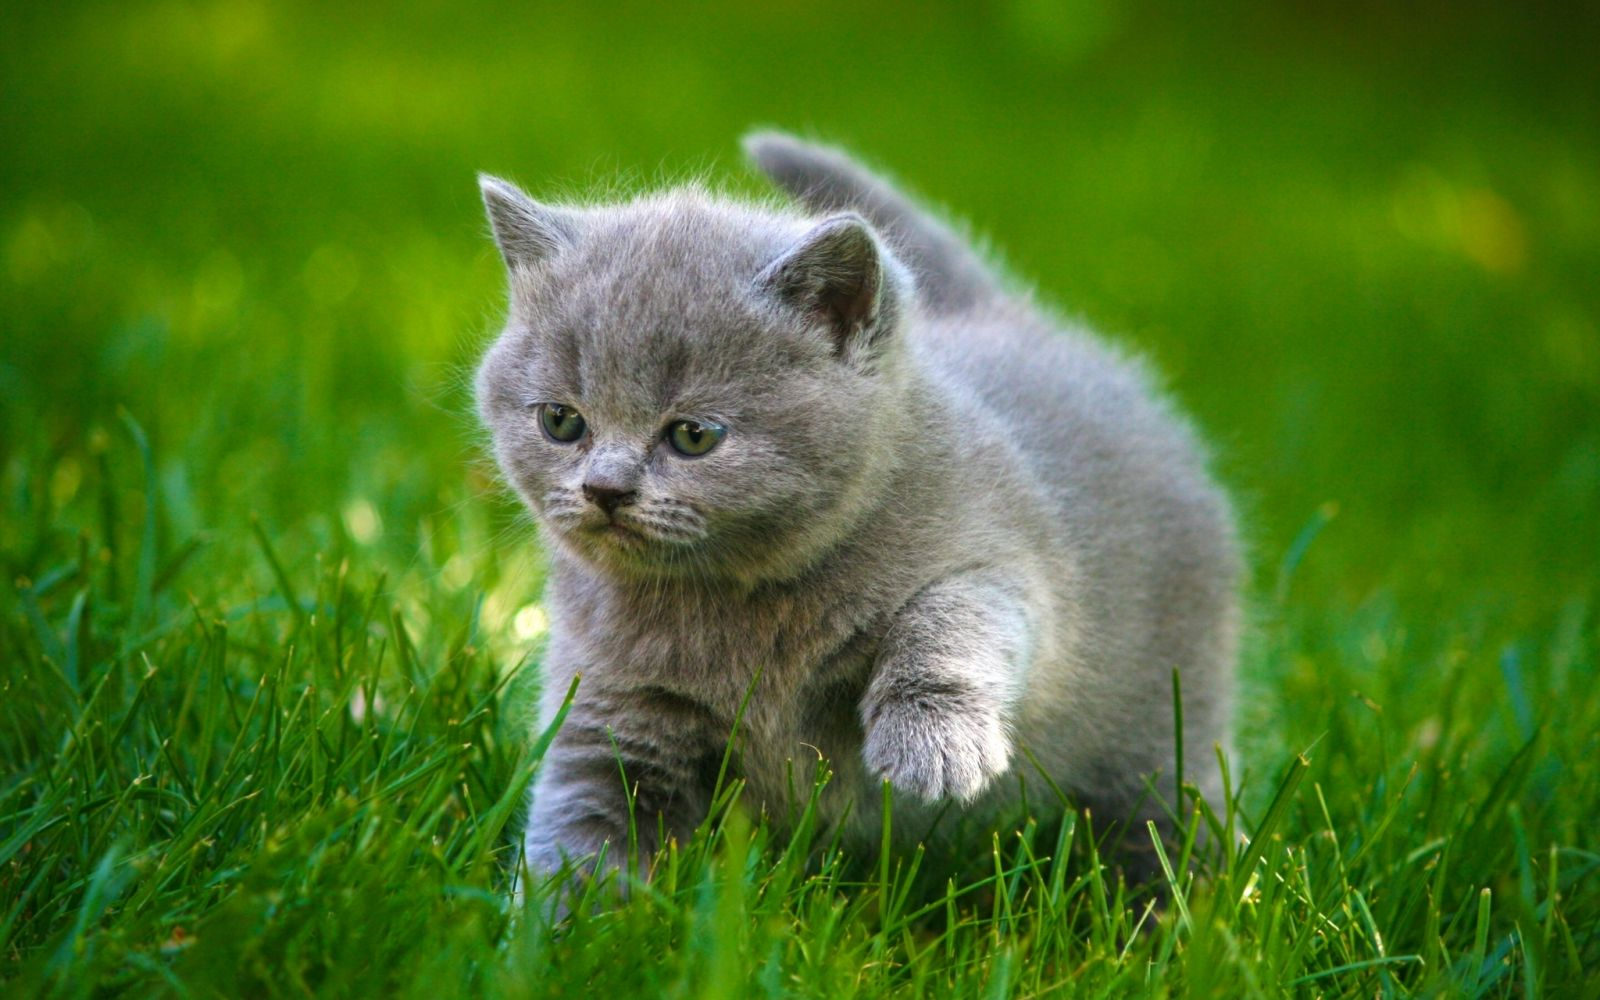

In [32]:
from IPython.display import Image
print('image name: ',pic_name)
Image(filename=pic_name)

Save an image object in a different format: save from jpg to png

In [33]:
from PIL import Image
image1 = Image.open(pic_name)
image1.save(pic_name[:-3]+'png')
print('image name: ',pic_name[:-3]+'png')

image name:  fat_kitty.png


Resize an image with image`.thumbnail(<size>)`

In [6]:
from PIL import Image
size_500 = (500,500)
image1 = Image.open(pic_name)
image1.thumbnail(size_500)
image1.save(pic_name[:-4]+'_500.png')

image name:  fat_kitty_500.png


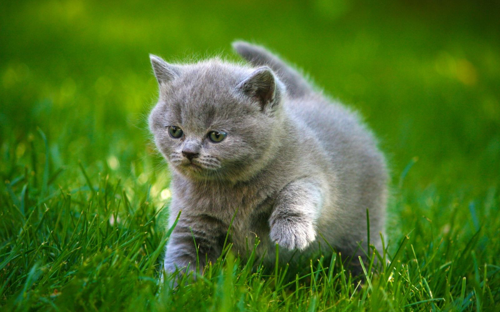

In [34]:
from IPython.display import Image
print('image name: ',pic_name[:-4]+'_500.png')
Image(filename=pic_name[:-4]+'_500.png')

Save all images from one directory to another directory in a different format

In [35]:
from PIL import Image
import os
os.mkdir('NewFolder')
for f in os.listdir(str(os.getcwd())):
    if f.endswith('.jpg') or f.endswith ('gif'):
        print(f)
        i = Image.open(f)
        f_name, f_ext = os.path.splitext(f)
        i.save('NewFolder/{}.png'.format(f_name))

fat_kitty.jpg
fat_kitty_copy.jpg
fat_kitty_copy2.jpg


In [38]:
#Resize images
from PIL import Image
import os
size_300 = (300,300) #300 pixel image
size_100 = (100,100)
os.mkdir('300')
os.mkdir('100')
for f in os.listdir(str(os.getcwd())):
    if f.endswith('.jpg') or f.endswith ('gif'):
        i = Image.open(f)
        f_name, f_ext = os.path.splitext(f)
        i.thumbnail(size_300)
        i.save('300/{}_300{}'.format(f_name,f_ext))
        i.thumbnail(size_100)
        i.save('100/{}_100{}'.format(f_name,f_ext))

300/fat_kitty_300.jpg


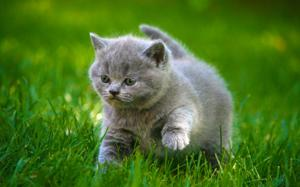

In [41]:
from IPython.display import Image
new_pic_name = '300/'+pic_name[:-4]+'_300.jpg'
print(new_pic_name)
Image(filename=new_pic_name)

100/fat_kitty_100.jpg


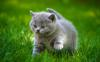

In [42]:
from IPython.display import Image
new_pic_name = '100/'+pic_name[:-4]+'_100.jpg'
print(new_pic_name)
Image(filename=new_pic_name)

Rotate an image

fat_kitty_500_rotated.png


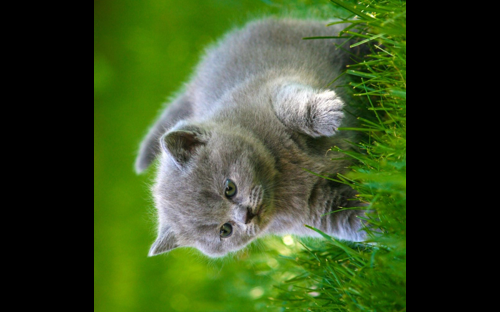

In [46]:
from PIL import Image
import os
image1 = Image.open(pic_name[:-4]+'_500.png')
image1.rotate(90).save(pic_name[:-4]+'_500_rotated.png') #rotate 90 degree
from IPython.display import Image
new_pic_name = pic_name[:-4]+'_500_rotated.png'
print(new_pic_name)
Image(filename=new_pic_name)

Convert an image to black and white

Documentation for image modes: http://pillow.readthedocs.io/en/4.2.x/handbook/index.html

fat_kitty_500_blkwht.png


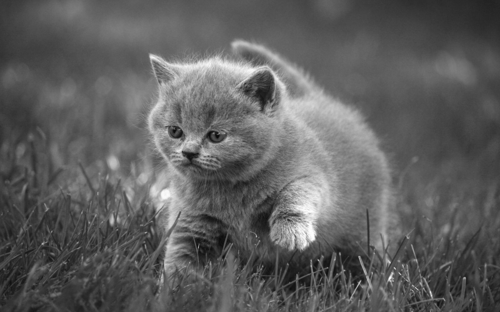

In [47]:
from PIL import Image
import os
image1 = Image.open(pic_name[:-4]+'_500.png')
image1.convert(mode='L').save(pic_name[:-4]+'_500_blkwht.png') #mode L = black and white
from IPython.display import Image
new_pic_name = pic_name[:-4]+'_500_blkwht.png'
print(new_pic_name)
Image(filename=new_pic_name)

Blur an image

Default value of blur is 2 which is not so blur. We can modify it to much more blur with GaussianBlur(5) or a bigger number

fat_kitty_500_blur.png


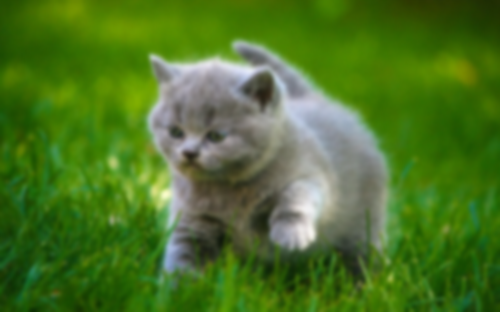

In [48]:
from PIL import Image, ImageFilter
import os
image1 = Image.open(pic_name[:-4]+'_500.png')
image1.filter(ImageFilter.GaussianBlur()).save(pic_name[:-4]+'_500_blur.png')
from IPython.display import Image
new_pic_name = pic_name[:-4]+'_500_blur.png'
print(new_pic_name)
Image(filename=new_pic_name)

## TOPIC 6 - EXTRA CODES AND TIPS

#### Print out all files of the same type as selected in one directory

In [49]:
import os
os.chdir('Y:\\local_qpy35_projects\Demo_folder')
print(str(os.getcwd()))

Y:\local_qpy35_projects\Demo_folder


In [50]:
import os, glob
for file in glob.glob("*.txt"):
    print(file)

Test2.txt
test_file.txt
test_file_copy.txt
07-ABC.txt
Test2_copy.txt
06-DEF.txt
05-GHI.txt
04-JKL.txt
03-MNO.txt
02-PQR.txt
01-STU.txt


`%` for finding residual after a division

In [53]:
#Fizz Buzz
for num in range(1,16):
    if num % 5 == 0 and num % 3 == 0:
        print("FizzBuzz")
    elif num % 3 == 0:
        print("Fizz")
    elif num % 5 == 0:
        print("Buzz")
    else:
        print(num)

1
2
Fizz
4
Buzz
Fizz
7
8
Fizz
Buzz
11
Fizz
13
14
FizzBuzz


In [56]:
# Fibonacci Sequence
a,b = 0,1
for i in range(0,6):
    print(a)
    a,b = b,a + b

0
1
1
2
3
5


In [58]:
# Fibonacci Generator
def fib(num):
    a,b = 0,1
    for i in range(0,num):
        yield "{}: {}".format(i+1,a)
        a,b = b,a + b
for item in fib(6):
    print(item)

1: 0
2: 1
3: 1
4: 2
5: 3
6: 5


#### Else Clauses on Loops

`for` loop breaks `after` the index number

In [63]:
my_list = [1,2,3,4,5,6]
for i in my_list:
    print( i)
    if i == 6:
        break
else: #think of this as NO BREAK
    print( 'Hit the For/Else Statement!')

1
2
3
4
5
6


In [64]:
my_list = [1,2,3,4,5]
for i in my_list:
    print( i)
    if i == 6:
        break
else: #think of this as NO BREAK
    print( 'Hit the For/Else Statement!')

1
2
3
4
5
Hit the For/Else Statement!


`while` loop breaks `at` the index number

In [66]:
i = 1
while i <= 3:
    print(i)
    i += 1
    if i == 6:
        break
else: # is treated as the next index number after while condition without break
    print('Hit the While/Else Statement')

1
2
3
Hit the While/Else Statement


In [67]:
i = 1
while i <= 5:
    print(i)
    i += 1
    if i == 6:
        break
else: # is treated as the next index number after while condition without break
    print('Hit the While/Else Statement')

1
2
3
4
5


In [68]:
num = 3
if num < 2:
    print ('num is less than 2')
else:
    print ('num is not less than 2')

num is not less than 2


In [73]:
def find_index(to_search, target):
    for i, value in enumerate(to_search):
        if value == target:
            break
    else: #if no break
        return -1
    return i
my_list = ['A', 'B', 'C']
index_location = find_index(my_list,'C')
print ('Location of C is index: {}'.format(index_location))
index_location = find_index(my_list,'A')
print ('Location of A is index: {}'.format(index_location))

Location of C is index: 2
Location of A is index: 0


In [75]:
my_list = ['A', 'B', 'C']
for x in my_list:
    idx = my_list.index(x)
    print('index of ',x,' is',idx)

index of  A  is 0
index of  B  is 1
index of  C  is 2


Ex Machina Easter Egg - Hidden Message within the Code

In [82]:
#BlueBook code decrytion
import sys
def sieve(n):
    x = [1] * n
    x[1] = 0
    for i in range(2,int(n/2)):
        j = 2*i
        while j <n:
            x[j] = 0
            j += i
    return x
def prime(n,x):
    i = 1
    j = 1
    while j <= n:
        if x[i] == 1:
            j += 1
        i += 1
    return i - 1
x = sieve(10000)
code = [1206,301,384,5]
key = [1,1,2,2]
sys.stdout.write("".join(chr(i) for i in [73,83,66,78,32,61,32]))
for i in range (4):
    sys.stdout.write(str(prime(code[i],x) - key[i]))

ISBN = 9780199226559